In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcursors

# read in both datasets

df = pd.read_csv('NIBRS_GroupA_Crime_Data_-7289083208753158368.csv')
df2 = pd.read_csv('NIBRS_GroupA_Crime_Data_8914151926081121180.csv')
simple_df = df[['CCNumber', 'CrimeDateTime', 'Description']]
simple_df2 = df2[['CCNumber', 'CrimeDateTime', 'Description']]

# combine them, dropping duplicate rows

combined_df = pd.concat([simple_df, simple_df2]).drop_duplicates()

C:\Users\sofia\AppData\Local\Temp\ipykernel_24168\350705205.py:9: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('NIBRS_GroupA_Crime_Data_8914151926081121180.csv')


In [104]:
# ensure date column is in datetime format

combined_df['CrimeDateTime'] = pd.to_datetime(combined_df['CrimeDateTime'])

# filter to date range of interest

start_date = pd.Timestamp('2024-03-01')
end_date = pd.Timestamp('2025-02-28')
crime = combined_df[(combined_df['CrimeDateTime'] >= start_date) & (combined_df['CrimeDateTime'] <= end_date)].reset_index(drop=True)

# create month column

crime['Month'] = crime['CrimeDateTime'].dt.month
crime['Year'] = crime['CrimeDateTime'].dt.year

In [108]:
# explore descriptions of each crime

crime['Description'].unique()

# sort crimes into 3 overall categories

violent_crimes = [
    'AGG. ASSAULT', 'COMMON ASSAULT', 'ROBBERY', 'ROBBERY - COMMERCIAL',
    'ROBBERY - CARJACKING', 'HOMICIDE','KIDNAPPING', 'INTIMIDATION', 'RAPE', 'SEX OFFENSES', 'HUMAN TRAFFICKING'
]

other = [
    'BURGLARY', 'LARCENY', 'AUTO THEFT', 'LARCENY FROM AUTO',
    'LARCENY OF MOTOR VEHICLE PARTS OR ACCESSORIES', 'SHOPLIFTING',
    'ARSON', 'VANDALISM', 'STOLEN PROPERTY', 'FRAUD', 'EXTORTION', 'DRUG/NARCOTIC VIOLATIONS', 'WEAPON VIOLATIONS', 'PORNOGRAPHY', 'ANIMAL CRUELTY'
]


conditions = [
    crime['Description'].isin(violent_crimes),
    crime['Description'].isin(other)
]

choices = ['Violent Crimes', 'other']

# create the new column for category

crime['Category'] = np.select(conditions, choices, default='Other')


In [117]:
violent_filtered = crime[crime['Category'] == 'Violent Crimes']

assault_threats = [
    'AGG. ASSAULT', 'COMMON ASSAULT', 'INTIMIDATION'
]

robbery_abduction = [
   'ROBBERY', 'ROBBERY - COMMERCIAL',
    'ROBBERY - CARJACKING', 'KIDNAPPING'
]

sexual_fatal = [
    'RAPE', 'SEX OFFENSES', 'HUMAN TRAFFICKING','HOMICIDE'
]

conditions = [
    violent_filtered['Description'].isin(assault_threats),
    violent_filtered['Description'].isin(robbery_abduction),
    violent_filtered['Description'].isin(sexual_fatal)
]

choices = ['Assault or Threats', 'Robbery or Abduction', 'Sexual or Homicide']

# create the new column for subcategory

violent_filtered['SubCategory'] = np.select(conditions, choices, default='Other')

# group by month and subcategory, count occurrences

monthly_counts = violent_filtered.groupby(['Year','Month', 'SubCategory']).size().unstack(fill_value=0)



C:\Users\sofia\AppData\Local\Temp\ipykernel_24168\1447719927.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violent_filtered['SubCategory'] = np.select(conditions, choices, default='Other')


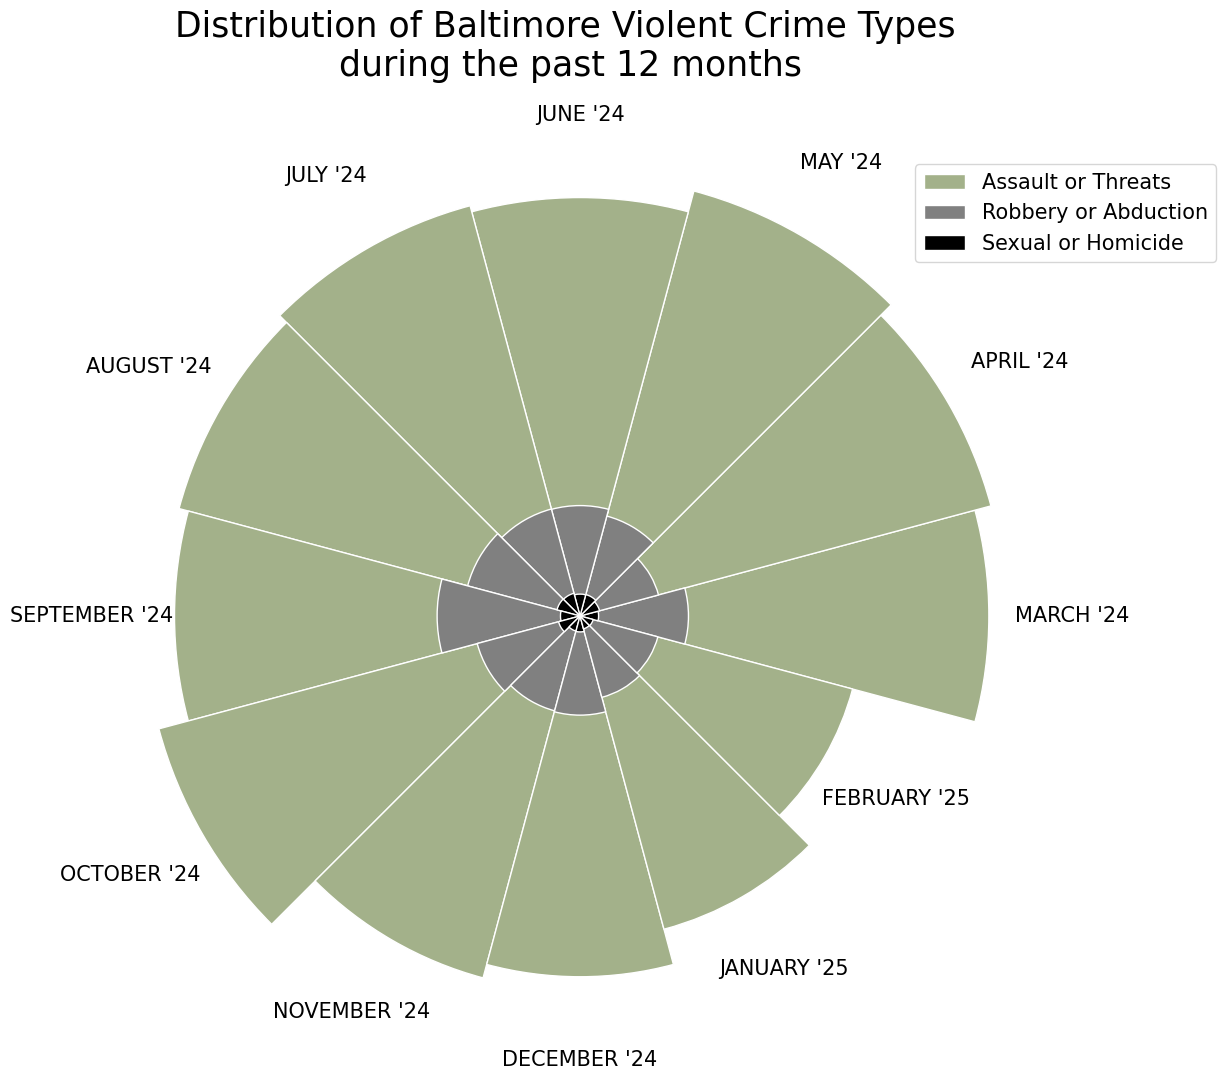

In [ ]:
# create florence nightingale style plot

n = 12

assault = monthly_counts['Assault or Threats']
robbery = monthly_counts['Robbery or Abduction']
sexual_homicide = monthly_counts['Sexual or Homicide']

names = ['MARCH \'24', 'APRIL \'24', 'MAY \'24', 'JUNE \'24', 'JULY \'24', 'AUGUST \'24', 
         'SEPTEMBER \'24', 'OCTOBER \'24', 'NOVEMBER \'24', 'DECEMBER \'24', 'JANUARY \'25', 'FEBRUARY \'25']

rad = np.linspace(0, 2 * np.pi, n, endpoint=False)
width = 2 * np.pi / n

plt.figure(figsize=(12, 12))
ax = plt.subplot(polar=True)

ax.bar(rad, assault, width=width, color="#A3B18A", edgecolor='white', linewidth=1, label='Assault or Threats')
ax.bar(rad, robbery, width=width, color="grey", edgecolor="white", linewidth=1, label='Robbery or Abduction')
ax.bar(rad, sexual_homicide, width=width, color="black", edgecolor="white", linewidth=1, label='Sexual or Homicide')

for i in range(n):
    ax.text(rad[i], max(assault.iloc[i], robbery.iloc[i], sexual_homicide.iloc[i]) + 250, names[i], 
            horizontalalignment='center', verticalalignment='center', fontsize=15, color='black')
    
ax.grid(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.spines['polar'].set_visible(False)

ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize = 15)

plt.suptitle('Distribution of Baltimore Violent Crime Types\n during the past 12 months', fontsize = 25, y = 1)

# save locally
#plt.savefig('crime.png', dpi=300, bbox_inches='tight')

plt.show()
